In [ ]:
from __future__ import division
import time
%pylab inline
%matplotlib inline
%load_ext autoreload
%autoreload 2

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_sparse_coded_signal
import numpy as np

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import requests
from imageio import imread
from io import BytesIO
url = 'https://www.ec-lyon.fr/sites/default/files/styles/full/public/dji_0001_copie.jpg'
res = requests.get(url)
z = imread(BytesIO(res.content))/255.
# distort the clean signal
noise_std = .1
y_noisy = z + np.random.randn(*z.shape)*noise_std

(-0.5, 999.5, 666.5, -0.5)

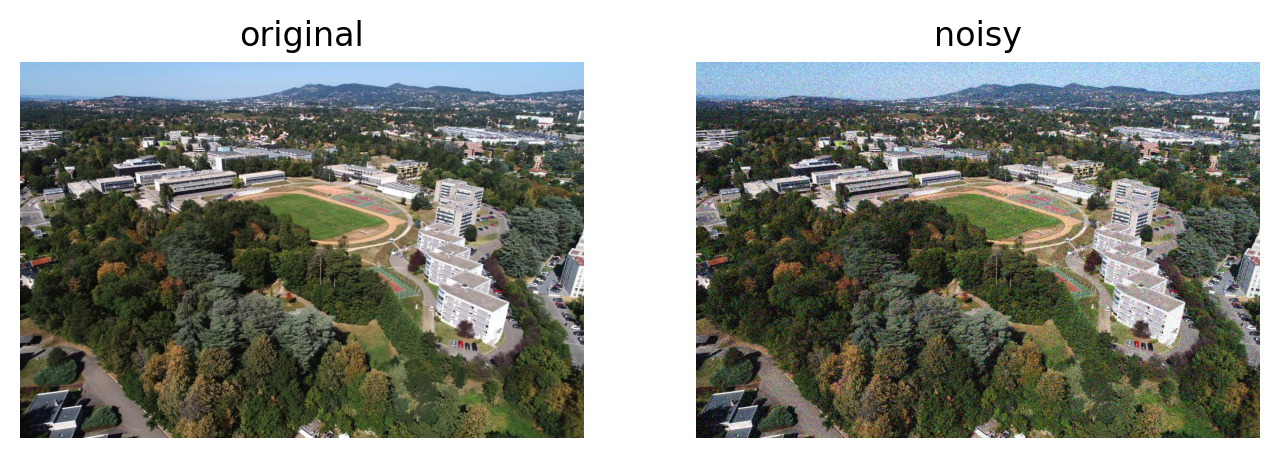

In [ ]:
plt.figure(figsize=(8, 16), dpi=200)
plt.subplot(1,2,1)
plt.imshow(z)
plt.title('original')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(y_noisy)
plt.title('noisy')
plt.axis('off')

In [ ]:
from scipy.fftpack import dct, idct

A = lambda x: dct(dct(x, axis=0, norm='ortho'),axis=1, norm='ortho')
A_transpose = lambda x: idct(idct(x,axis=1, norm='ortho'),axis=0, norm='ortho')

In [ ]:
Lambda = .3 # regularization parameter try other values
gamma = .5 # step size try other values (or directly calculate the Lipschitz constant of A!)
nbiter = 100

In [ ]:
def prox_g (x, s) :
    return x - x/maximum(abs(x)/s, 1) # soft-thresholding

In [ ]:
grad_f = lambda x : A_transpose(A(x)-y_noisy)
x = zeros_like(y_noisy)
En_array = zeros(nbiter+1)
start_time = time.time()
for iter in range(nbiter):  # iter goes from 0 to nbiter-1
    x = prox_g(x - gamma*grad_f(x), Lambda*gamma)
x_restored = A(x)
print("--- %s seconds ---" % (time.time() - start_time))

--- 21.235835552215576 seconds ---


(-0.5, 999.5, 666.5, -0.5)

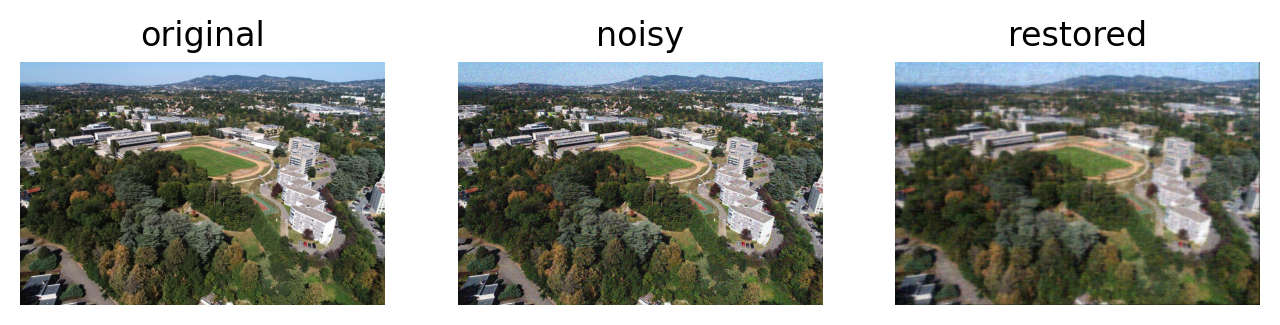

In [ ]:
plt.figure(figsize=(8, 24), dpi=200)
plt.subplot(1,3,1)
plt.imshow(z)
plt.title('original')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(y_noisy)
plt.title('noisy')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(x_restored)
plt.title('restored')
plt.axis('off')